In [236]:
import pandas as pd

# Charger les données
df = pd.read_csv("supermarket_sales.csv")

# Afficher les 5 premières lignes
print(df.head())

# Infos générales
print(df.info())

# Statistiques descriptives
print(df.describe(include='all'))


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [238]:
# Vérification des doublons
print("Doublons :", df.duplicated().sum())

# Valeurs manquantes
print("Valeurs manquantes :")
print(df.isnull().sum())


Doublons : 0
Valeurs manquantes :
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [240]:
# Fusionner Date + Time en une seule colonne DateTime
df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + ' ' + df["Time"])

# Vérifier que la colonne DateTime est bien créée
print(df[["Date", "Time", "DateTime"]].head())


        Date   Time            DateTime
0   1/5/2019  13:08 2019-01-05 13:08:00
1   3/8/2019  10:29 2019-03-08 10:29:00
2   3/3/2019  13:23 2019-03-03 13:23:00
3  1/27/2019  20:33 2019-01-27 20:33:00
4   2/8/2019  10:37 2019-02-08 10:37:00


In [242]:
# Extraire le mois et l'année de la colonne DateTime
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year

# Calculer le total des ventes par mois et par année
monthly_sales = df.groupby(['Year', 'Month'])['Total'].sum().sort_values()

# Afficher les résultats
print(monthly_sales)


Year  Month
2019  2         97219.374
      3        109455.507
      1        116291.868
Name: Total, dtype: float64


In [244]:
# Vérifier les années et mois présents dans la colonne DateTime
df['YearMonth'] = df['DateTime'].dt.to_period('M')
unique_year_months = df['YearMonth'].unique()

# Afficher les mois uniques présents
print("Mois disponibles dans les données :", unique_year_months)


Mois disponibles dans les données : <PeriodArray>
['2019-01', '2019-03', '2019-02']
Length: 3, dtype: period[M]


In [246]:
# Compter le nombre d'occurrences pour chaque mois
monthly_counts = df['YearMonth'].value_counts().sort_index()

# Afficher les résultats
print(monthly_counts)


YearMonth
2019-01    352
2019-02    303
2019-03    345
Freq: M, Name: count, dtype: int64


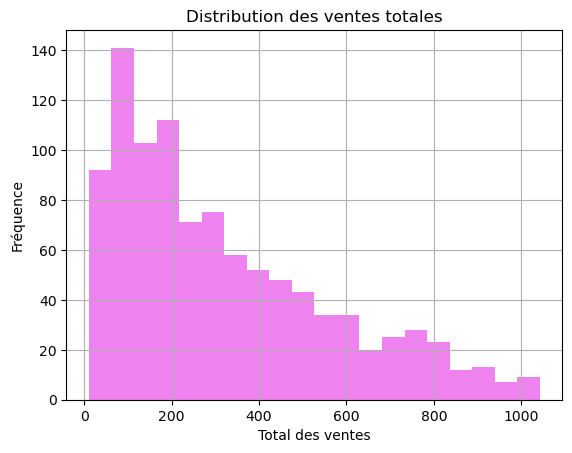

In [80]:
import matplotlib.pyplot as plt

# Histogramme de la colonne 'Total'
df['Total'].hist(bins=20, color='violet')
plt.title('Distribution des ventes totales')
plt.xlabel('Total des ventes')
plt.ylabel('Fréquence')
plt.show()


In [82]:
# Identification des colonnes non numériques
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques :", non_numeric_cols)


Colonnes non numériques : Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment', 'DateTime', 'YearMonth'],
      dtype='object')


In [84]:
# Agrégation des ventes par ligne de produit
ventes_par_produit = df.groupby('Product line')['Total'].sum().reset_index()

# Tri des résultats par total des ventes
ventes_par_produit = ventes_par_produit.sort_values(by='Total', ascending=False)

# Affichage des résultats
print(ventes_par_produit)


             Product line       Total
2      Food and beverages  56144.8440
5       Sports and travel  55122.8265
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
3       Health and beauty  49193.7390


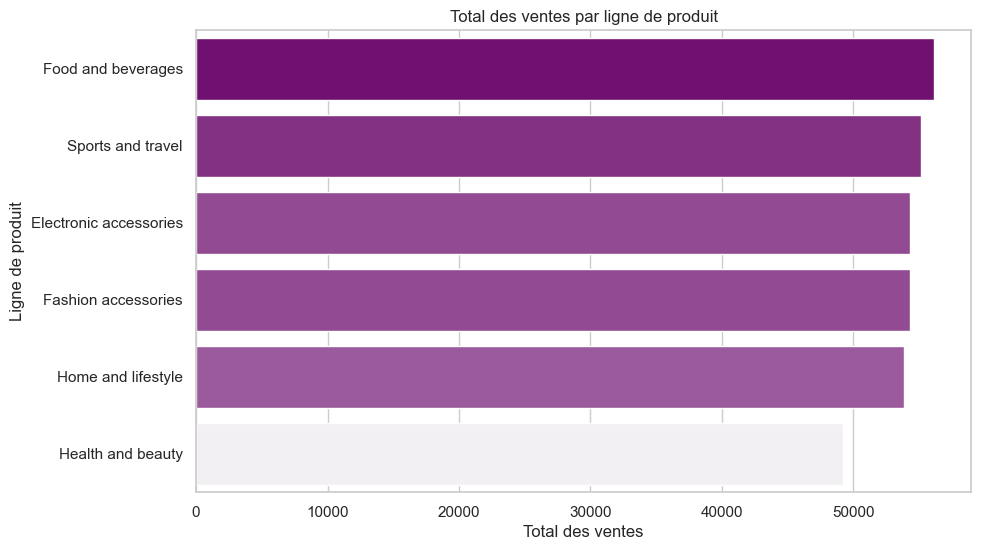

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalisation des valeurs des ventes
scaler = MinMaxScaler()
ventes_par_produit['Normalized'] = scaler.fit_transform(ventes_par_produit[['Total']])

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Product line', data=ventes_par_produit,
            palette=sns.light_palette("purple", as_cmap=True),
            hue='Normalized', dodge=False)

# Suppression de la légende
plt.legend([], [], frameon=False)

# Personnalisation du graphique
plt.title('Total des ventes par ligne de produit')
plt.xlabel('Total des ventes')
plt.ylabel('Ligne de produit')
plt.show()


In [88]:
# Agrégation des ventes par type de client
ventes_par_type_client = df.groupby('Customer type')['Total'].sum().reset_index()

# Tri des résultats par total des ventes
ventes_par_type_client = ventes_par_type_client.sort_values(by='Total', ascending=False)

# Affichage des résultats
print(ventes_par_type_client)


  Customer type       Total
0        Member  164223.444
1        Normal  158743.305


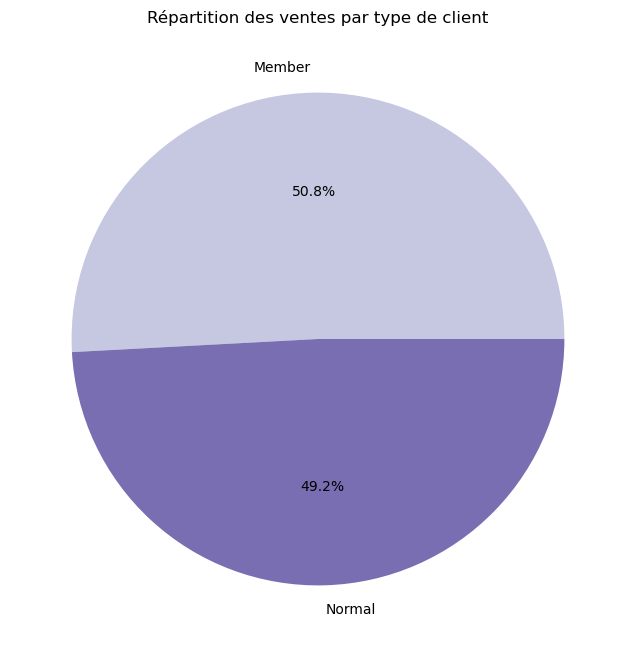

In [90]:
import matplotlib.pyplot as plt

# Agrégation des ventes par type de client
ventes_par_type_client = df.groupby('Customer type')['Total'].sum()

# Création du graphique circulaire
plt.figure(figsize=(8, 8))
ventes_par_type_client.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Purples", len(ventes_par_type_client)))
plt.title('Répartition des ventes par type de client')
plt.ylabel('')  # Supprime le label de l'axe des ordonnées
plt.show()

In [92]:
# Agrégation des ventes par genre
ventes_par_genre = df.groupby('Gender')['Total'].sum().reset_index()

# Tri des résultats par total des ventes
ventes_par_genre = ventes_par_genre.sort_values(by='Total', ascending=False)

# Affichage des résultats
print(ventes_par_genre)


   Gender       Total
0  Female  167882.925
1    Male  155083.824


/var/folders/yz/y40r89592y9dhh5ssy5l_wvm0000gn/T/ipykernel_17957/4069358122.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




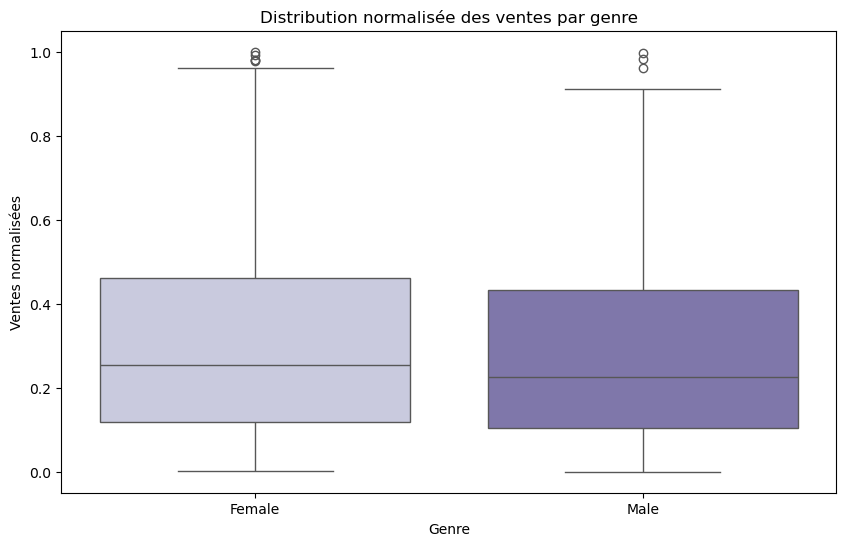

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Initialisation du scaler
scaler = MinMaxScaler()

# Normalisation des ventes
df['Total_normalized'] = scaler.fit_transform(df[['Total']])

import seaborn as sns
import matplotlib.pyplot as plt

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total_normalized', data=df, palette='Purples')

# Personnalisation du graphique
plt.title('Distribution normalisée des ventes par genre')
plt.xlabel('Genre')
plt.ylabel('Ventes normalisées')
plt.show()


/var/folders/yz/y40r89592y9dhh5ssy5l_wvm0000gn/T/ipykernel_17957/3183020887.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




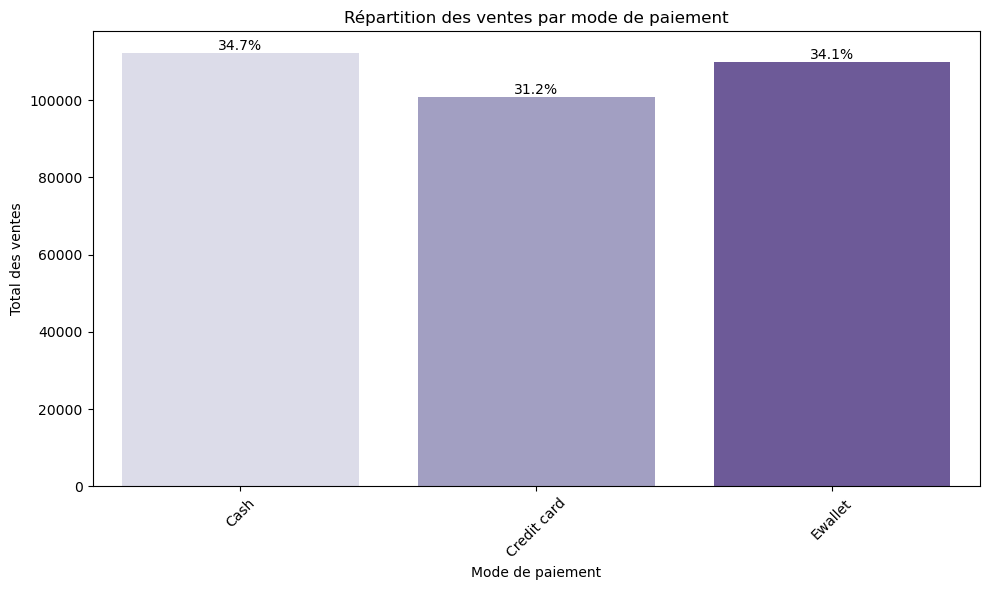

In [96]:
import pandas as pd

# Supposons que 'df' est votre DataFrame et 'Total' la colonne des ventes
# Calcul du total des ventes par mode de paiement
total_par_paiement = df.groupby('Payment')['Total'].sum().reset_index()

# Calcul du pourcentage
total_general = total_par_paiement['Total'].sum()
total_par_paiement['Pourcentage'] = (total_par_paiement['Total'] / total_general) * 100

import seaborn as sns
import matplotlib.pyplot as plt

# Création du barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Payment', y='Total', data=total_par_paiement, palette='Purples')

# Ajout des pourcentages au-dessus de chaque barre
for index, row in total_par_paiement.iterrows():
    ax.text(index, row['Total'], f"{row['Pourcentage']:.1f}%", color='black', ha="center", va="bottom")

# Personnalisation du graphique
plt.title('Répartition des ventes par mode de paiement')
plt.xlabel('Mode de paiement')
plt.ylabel('Total des ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [98]:
# Calcul du panier moyen
panier_moyen = df['Total'].sum() / df['Invoice ID'].nunique()
print(f"Panier moyen par client : {panier_moyen:.2f}")


Panier moyen par client : 322.97


In [100]:
# Calcul du taux de fidélisation
clients_membres = df[df['Customer type'] == 'Member']
taux_fidelisation = len(clients_membres) / len(df) * 100
print(f"Taux de fidélisation : {taux_fidelisation:.2f}%")


Taux de fidélisation : 50.10%


In [102]:
# Calcul du produit avec le meilleur ratio revenu/quantité
df['Revenue per Quantity'] = df['Total'] / df['Quantity']
meilleur_ratio = df.groupby('Product line')['Revenue per Quantity'].mean().idxmax()
print(f"Le produit avec le meilleur ratio revenu/quantité est : {meilleur_ratio}")


Le produit avec le meilleur ratio revenu/quantité est : Fashion accessories


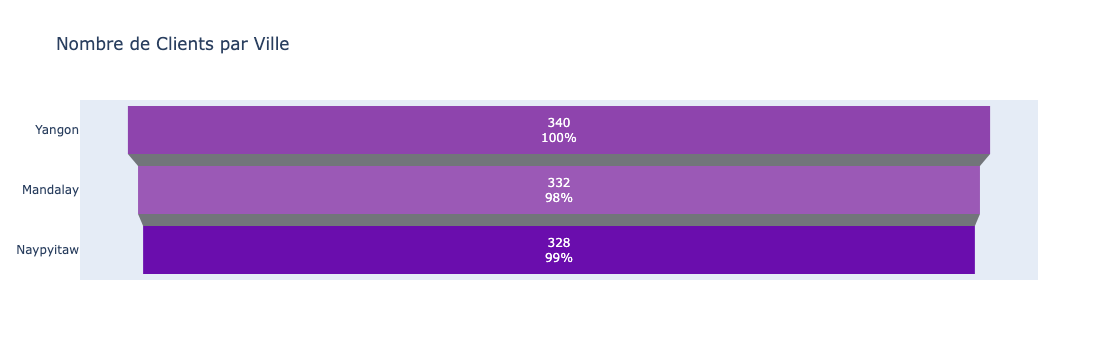

In [122]:
import pandas as pd
import plotly.graph_objects as go

# Charger les données
df = pd.read_csv("supermarket_sales.csv")

# Nettoyer les noms de ville au cas où
df["City"] = df["City"].str.strip()

# Compter le nombre de clients par ville
client_counts = df["City"].value_counts()

# Total des clients dans toutes les villes
total_clients = client_counts.sum()

# Calculer le pourcentage pour chaque ville par rapport au total global
percentages = (client_counts / total_clients) * 100

# Extraire les noms de villes et les valeurs
stages = client_counts.index.tolist()
values = client_counts.values.tolist()

# Créer l'entonnoir avec des couleurs violettes
fig = go.Figure(go.Funnel(
    y=stages,
    x=values,
    textinfo="value+percent previous",  # Changeons ici pour que le pourcentage soit par rapport à l'étape précédente
    hovertemplate="Ville: %{y}<br>Clients: %{x}<br>% du total: %{percent:.1f}%",
    marker=dict(color=['#8E44AD', '#9B59B6', '#6A0DAD'])  # Couleurs violettes
))

fig.update_layout(
    title="Nombre de Clients par Ville",
    showlegend=False
)

# Afficher le graphique
fig.show()


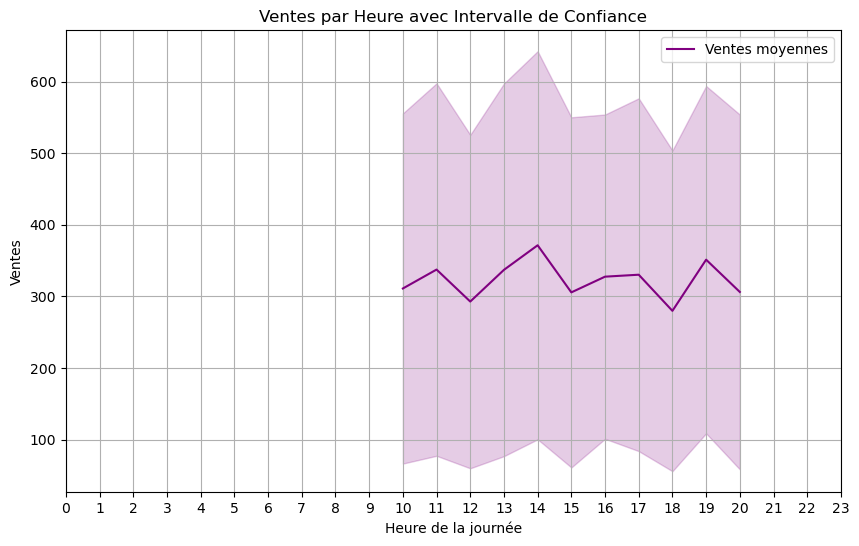

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Charger le jeu de données
df = pd.read_csv("supermarket_sales.csv")

# Extraire l'heure à partir de la colonne 'Time' (en supposant que l'heure soit déjà dans le format 'HH:MM')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Calculer la moyenne des ventes par heure
mean_sales_by_hour = df.groupby('Hour')['Total'].mean()

# Calculer l'écart-type des ventes par heure
std_devs_by_hour = df.groupby('Hour')['Total'].std()

# Création du graphique
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_sales_by_hour.index, y=mean_sales_by_hour, color='purple', label="Ventes moyennes")
plt.fill_between(mean_sales_by_hour.index, 
                 mean_sales_by_hour - std_devs_by_hour, 
                 mean_sales_by_hour + std_devs_by_hour, 
                 color='purple', alpha=0.2)

# Personnalisation
plt.title("Ventes par Heure avec Intervalle de Confiance")
plt.xlabel("Heure de la journée")
plt.ylabel("Ventes")
plt.xticks(np.arange(0, 24, 1))  # Pour afficher les heures de 0 à 23
plt.grid(True)
plt.show()


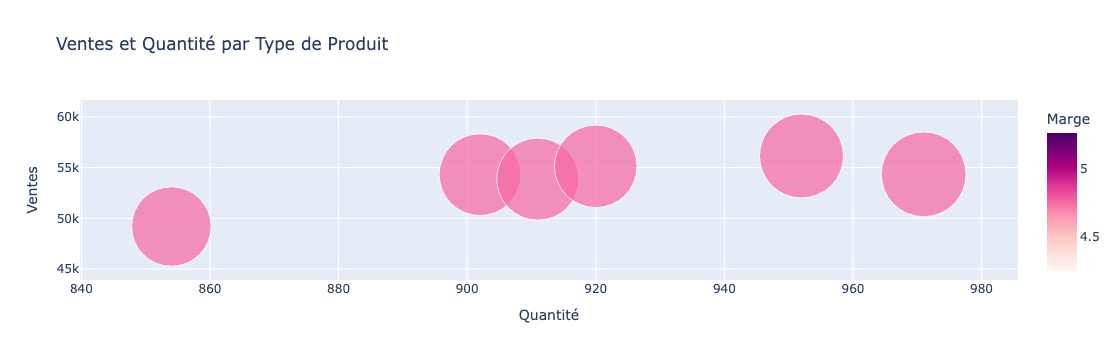

In [136]:
import pandas as pd
import plotly.express as px

# Chargement de ton jeu de données (je suppose que tu as déjà chargé ton fichier dans un DataFrame appelé 'df')
# df = pd.read_csv('ton_fichier.csv') # Si tu lis le fichier depuis un CSV

# On peut grouper les données par produit pour avoir les ventes totales et les quantités totales par produit
df_grouped = df.groupby('Product line').agg(
    Ventes=('Total', 'sum'), 
    Quantité=('Quantity', 'sum'), 
    Marge=('gross margin percentage', 'mean')
).reset_index()

# Création du graphique à bulles avec une palette de couleurs rose-violet
fig = px.scatter(
    df_grouped, 
    x='Quantité', 
    y='Ventes', 
    size='Quantité', 
    color='Marge', 
    hover_name='Product line',
    size_max=60, 
    color_continuous_scale='RdPu',  # Palette rose-violet
    title="Ventes et Quantité par Type de Produit"
)

# Affichage du graphique
fig.show()



In [106]:
import pandas as pd

# Chargement du fichier
df = pd.read_csv("supermarket_sales.csv")

# Affichage des premières lignes pour voir la structure
print(df.head())

# Affichage des noms de colonnes
print(df.columns)


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

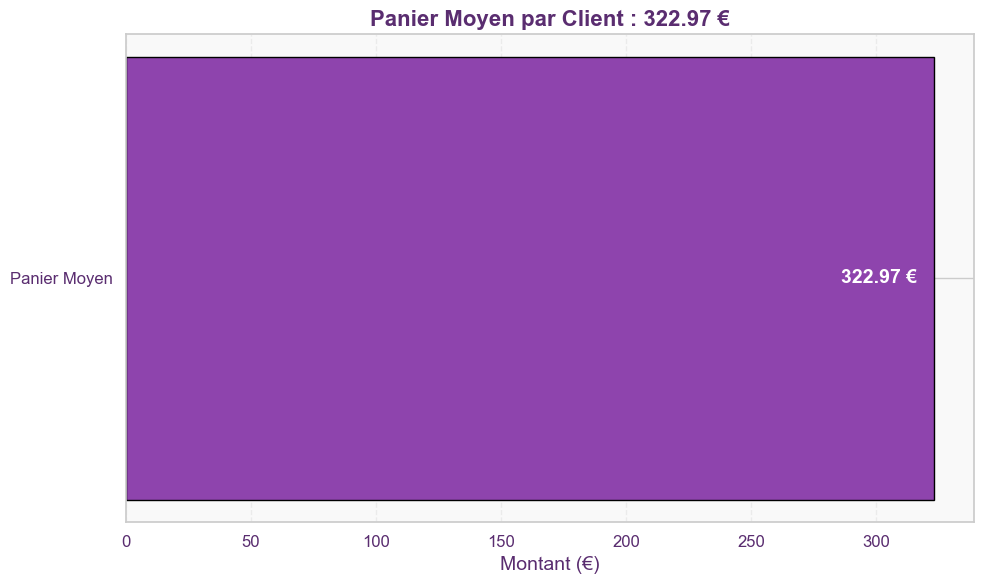

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul du panier moyen
panier_moyen = df['Total'].sum() / df['Invoice ID'].nunique()

import matplotlib.pyplot as plt

# Tracer les ventes par catégorie
daily_sales_by_product.plot(figsize=(12, 6))
plt.title('Évolution des ventes par catégorie de produit')
plt.ylabel('Total des ventes')
plt.xlabel('Date')
plt.grid(True)
plt.legend(title='Catégorie')
plt.show()



In [162]:
import pandas as pd

# Charger les données
df = pd.read_csv("supermarket_sales.csv")

# Convertir la colonne 'Date' en format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Regrouper les ventes totales par date et par catégorie de produit
daily_sales_by_product = df.groupby(['Date', 'Product line'])['Total'].sum().unstack(fill_value=0)


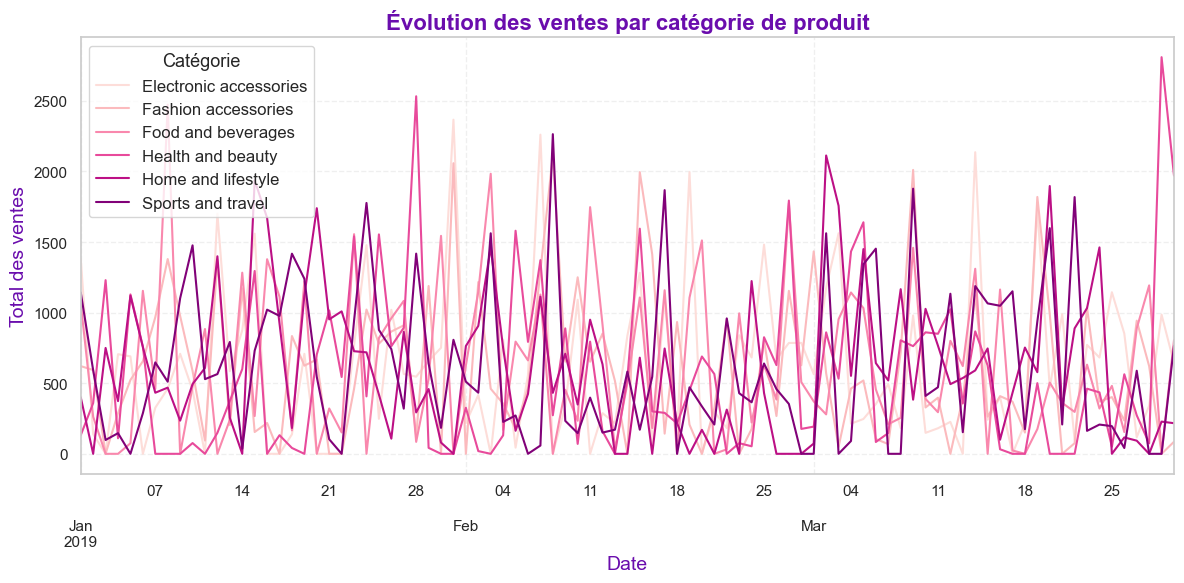

In [176]:
import matplotlib.pyplot as plt

# Tracer l'évolution des ventes par catégorie de produit
daily_sales_by_product.plot(figsize=(12, 6), color=sns.color_palette("RdPu", len(daily_sales_by_product.columns)))

plt.title('Évolution des ventes par catégorie de produit', fontsize=16, weight='bold', color='#6A0DAD')
plt.ylabel('Total des ventes', fontsize=14, color='#6A0DAD')
plt.xlabel('Date', fontsize=14, color='#6A0DAD')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Catégorie', title_fontsize='13', loc='upper left', fontsize='12')
plt.tight_layout()
plt.show()



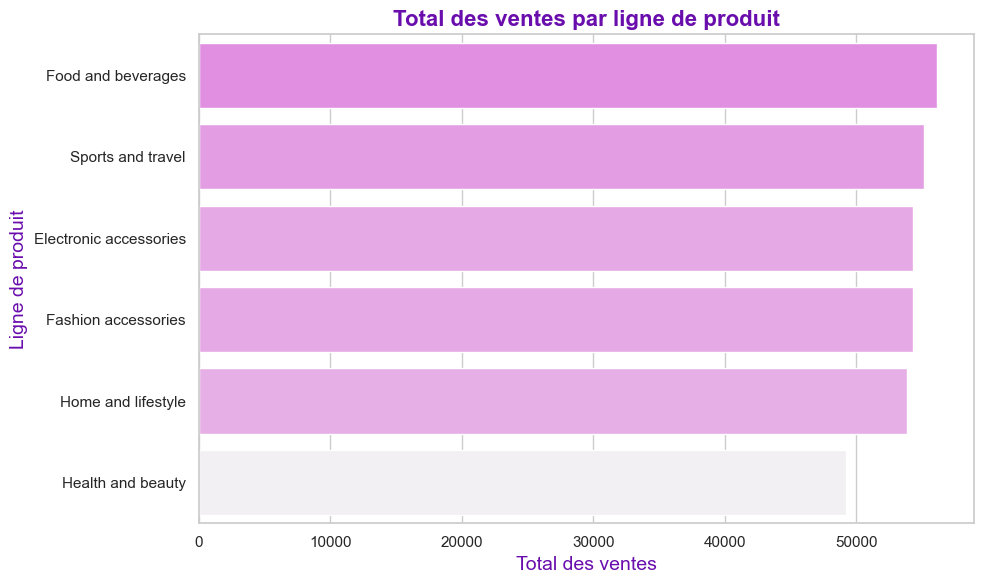

In [180]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Normalisation des valeurs des ventes
scaler = MinMaxScaler()
ventes_par_produit['Normalized'] = scaler.fit_transform(ventes_par_produit[['Total']])

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Product line', data=ventes_par_produit,
            palette=sns.light_palette("violet", as_cmap=True),
            hue='Normalized', dodge=False)

# Suppression de la légende
plt.legend([], [], frameon=False)

# Personnalisation du graphique
plt.title('Total des ventes par ligne de produit', fontsize=16, weight='bold', color='#6A0DAD')
plt.xlabel('Total des ventes', fontsize=14, color='#6A0DAD')
plt.ylabel('Ligne de produit', fontsize=14, color='#6A0DAD')
plt.tight_layout()
plt.show()


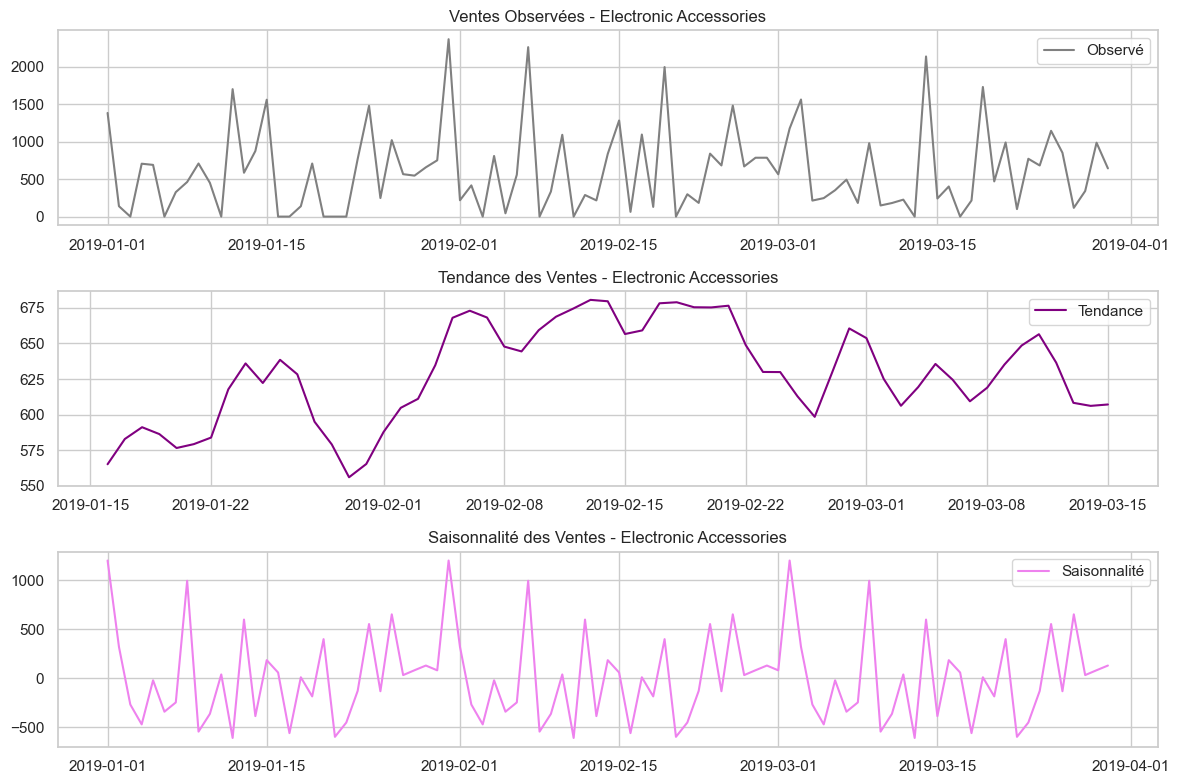

In [192]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Exemple pour une catégorie de produit, ici 'Electronic accessories'
# Si tu veux le faire pour d'autres catégories, répète cette procédure avec les autres colonnes
decomposition = seasonal_decompose(daily_sales_by_product['Electronic accessories'], model='additive', period=30)  # Ajuster period en fonction de la saisonnalité

# Tracer la décomposition saisonnière
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(decomposition.observed, label='Observé', color='grey')
plt.title('Ventes Observées - Electronic Accessories')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(decomposition.trend, label='Tendance', color='purple')
plt.title('Tendance des Ventes - Electronic Accessories')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(decomposition.seasonal, label='Saisonnalité', color='violet')
plt.title('Saisonnalité des Ventes - Electronic Accessories')
plt.legend()

plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=1386.049, Time=4.38 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1385.094, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1386.206, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1385.473, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1451.644, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=1385.565, Time=0.30 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=1385.637, Time=0.26 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=1387.636, Time=1.47 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1384.740, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1385.796, Time=0.55 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1387.796, Time=1.95 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=1386.173, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=1387.240, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=1384.227, Time=0.07 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept

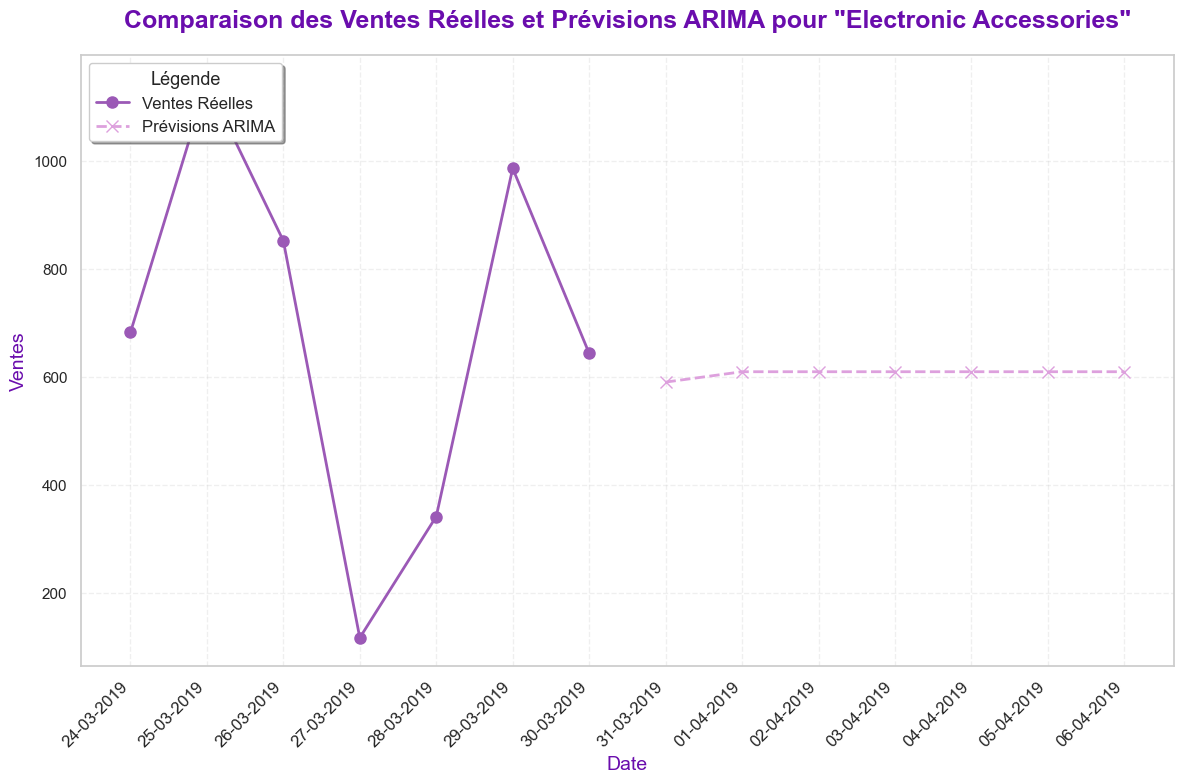

In [229]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pmdarima import auto_arima

# Fonction pour faire la prévision ARIMA avec recherche automatique des meilleurs paramètres
def forecast_arima(series, steps=7):
    try:
        # Recherche automatique des meilleurs hyperparamètres avec auto_arima
        model = auto_arima(series, seasonal=True, m=7, stepwise=True, trace=True)
        forecast = model.predict(n_periods=steps)
        # Retourner le modèle et la prévision
        return forecast, model
    except Exception as e:
        print(f"Erreur lors de la modélisation : {e}")
        return [None]*steps, None

# Appliquer le modèle ARIMA à "Electronic Accessories" pour obtenir les prévisions
forecast, model = forecast_arima(daily_sales_by_product['Electronic accessories'])

# Vérification que le modèle a bien produit des prévisions
if forecast is not None:
    forecast_df = pd.DataFrame(forecast, columns=['Electronic accessories'])
    forecast_df.index.name = 'Jour futur'

    # Exemple de comparaison avec les données réelles (prend les 7 derniers jours comme exemple)
    real_sales = daily_sales_by_product['Electronic accessories'].iloc[-7:]  # Dernières 7 valeurs réelles

    # Visualiser la comparaison
    plt.figure(figsize=(12, 8))

    # Tracer les ventes réelles
    plt.plot(real_sales.index, real_sales, label='Ventes Réelles', color='#9B59B6', marker='o', markersize=8, linewidth=2)  # Violet
    # Tracer les prévisions ARIMA
    plt.plot(forecast_df.index, forecast_df['Electronic accessories'], label='Prévisions ARIMA', color='#DDA0DD', linestyle='--', marker='x', markersize=8, linewidth=2)  # Rosé

    # Personnalisation du graphique
    plt.title('Comparaison des Ventes Réelles et Prévisions ARIMA pour "Electronic Accessories"', 
              fontsize=18, weight='bold', color='#6A0DAD', pad=20)

    # Customisation de l'axe X
    plt.xlabel('Date', fontsize=14, color='#6A0DAD')
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Customisation de l'axe Y
    plt.ylabel('Ventes', fontsize=14, color='#6A0DAD')

    # Améliorer la légende
    plt.legend(fontsize=12, loc='upper left', title='Légende', title_fontsize='13', shadow=True, fancybox=True)

    # Ajouter une grille légère
    plt.grid(True, linestyle='--', alpha=0.3)

    # Format de date sur l'axe X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())

    # Ajustement du layout
    plt.tight_layout()

    # Affichage du graphique
    plt.show()
else:
    print("Les prévisions n'ont pas pu être générées.")


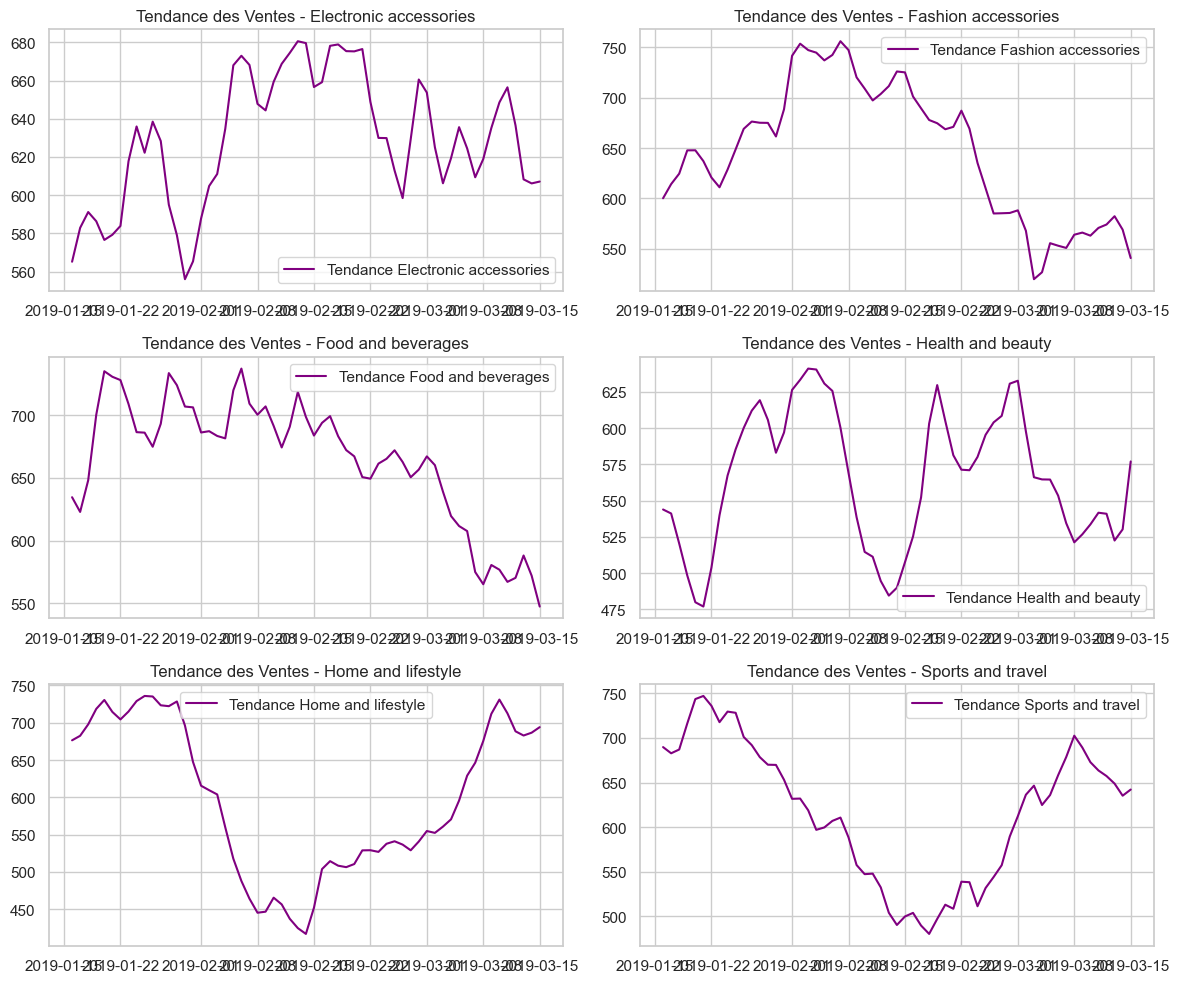

In [198]:
# Créer une figure
plt.figure(figsize=(12, 10))

# Liste des produits à analyser
products = ['Electronic accessories', 'Fashion accessories', 'Food and beverages', 
            'Health and beauty', 'Home and lifestyle', 'Sports and travel']

# Boucle pour tracer la tendance et la saisonnalité pour chaque produit
for i, product in enumerate(products):
    decomposition = seasonal_decompose(daily_sales_by_product[product], model='additive', period=30)
    
    # Tracer la tendance
    plt.subplot(3, 2, i+1)
    plt.plot(decomposition.trend, label=f'Tendance {product}', color='purple')
    plt.title(f'Tendance des Ventes - {product}')
    plt.legend()

plt.tight_layout()
plt.show()


In [216]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=1386.049, Time=4.18 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1385.094, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1386.206, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1385.473, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1451.644, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=1385.565, Time=0.28 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=1385.637, Time=0.20 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=1387.636, Time=1.32 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1384.740, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1385.796, Time=0.34 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1387.796, Time=1.52 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=1386.173, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=1387.240, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=1384.227, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept

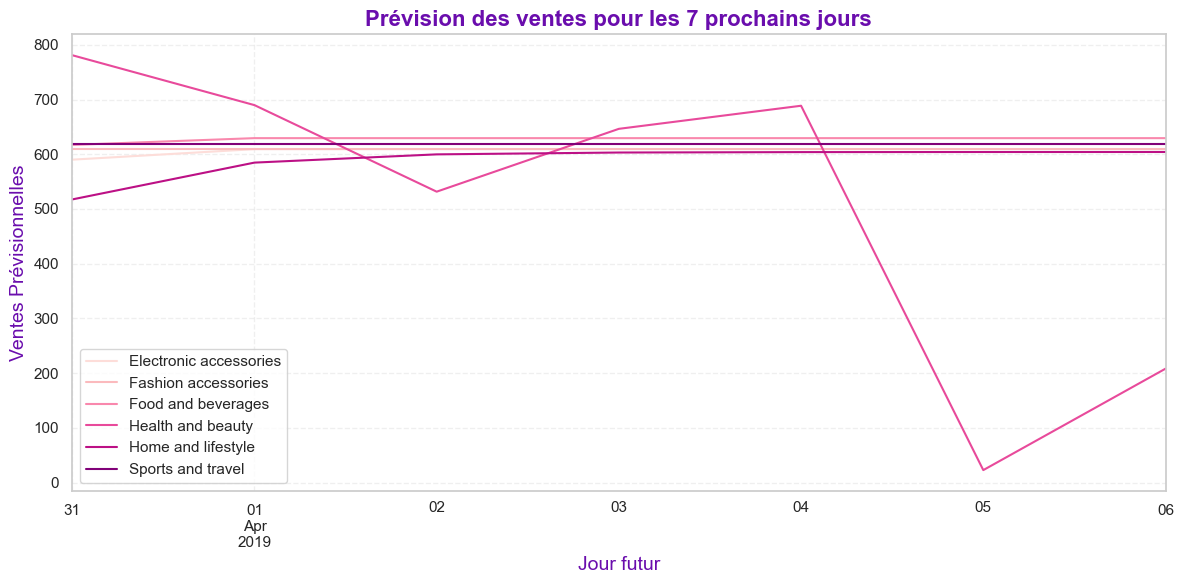

In [225]:
from pmdarima import auto_arima

# Fonction pour faire la prévision ARIMA avec recherche automatique des meilleurs paramètres
def forecast_arima(series, steps=7):
    try:
        # Recherche automatique des meilleurs hyperparamètres avec auto_arima
        model = auto_arima(series, seasonal=True, m=7, stepwise=True, trace=True)
        forecast = model.predict(n_periods=steps)
        # Afficher le résumé du modèle optimisé
        print(model.summary())  # Afficher les détails du modèle
        return forecast
    except Exception as e:
        print(f"Erreur lors de la modélisation : {e}")
        return pd.Series([None]*steps)

# Appliquer le modèle à chaque catégorie
forecast_results = {}

for column in daily_sales_by_product.columns:
    forecast = forecast_arima(daily_sales_by_product[column])
    forecast_results[column] = forecast

# Convertir en DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df.index.name = 'Jour futur'

# Affichage de la prévision
forecast_df.plot(figsize=(12, 6), color=sns.color_palette("RdPu", len(forecast_df.columns)))

plt.title('Prévision des ventes pour les 7 prochains jours', fontsize=16, weight='bold', color='#6A0DAD')
plt.xlabel('Jour futur', fontsize=14, color='#6A0DAD')
plt.ylabel('Ventes Prévisionnelles', fontsize=14, color='#6A0DAD')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



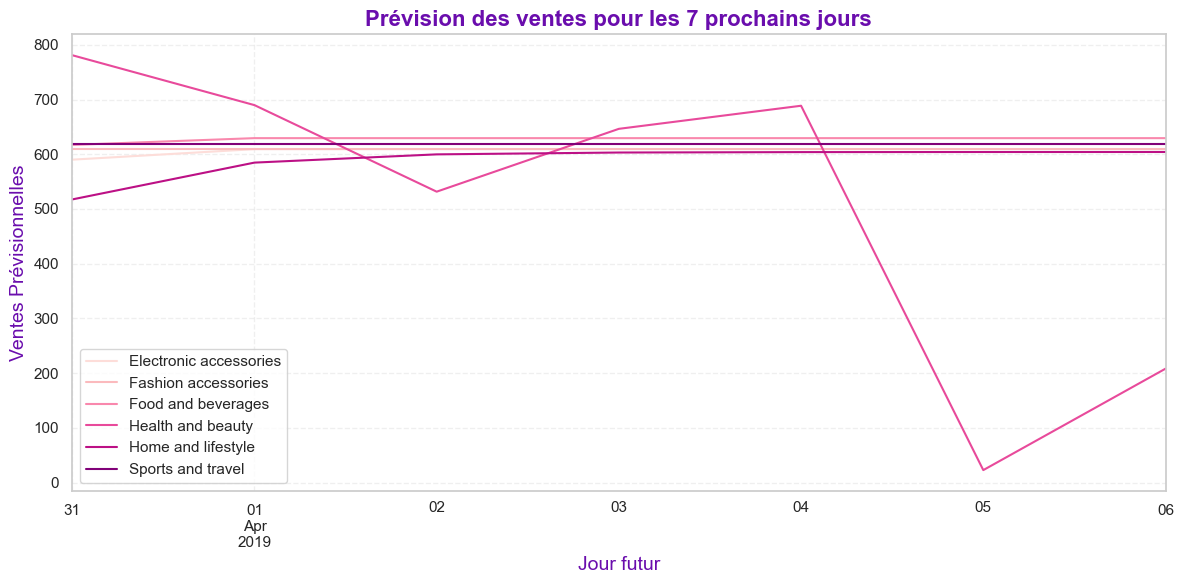

In [227]:
# Affichage de la prévision
forecast_df.plot(figsize=(12, 6), color=sns.color_palette("RdPu", len(forecast_df.columns)))

plt.title('Prévision des ventes pour les 7 prochains jours', fontsize=16, weight='bold', color='#6A0DAD')
plt.xlabel('Jour futur', fontsize=14, color='#6A0DAD')
plt.ylabel('Ventes Prévisionnelles', fontsize=14, color='#6A0DAD')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [233]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcul de l'Erreur Absolue Moyenne (MAE)
mae = mean_absolute_error(real_sales, forecast)
print(f"MAE: {mae}")

# Calcul de l'Erreur Carrée Moyenne (MSE)
mse = mean_squared_error(real_sales, forecast)
print(f"MSE: {mse}")

# Calcul de la Racine de l'Erreur Carrée Moyenne (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


MAE: 291.4468291993794
MSE: 115807.36616967917
RMSE: 340.30481361520464


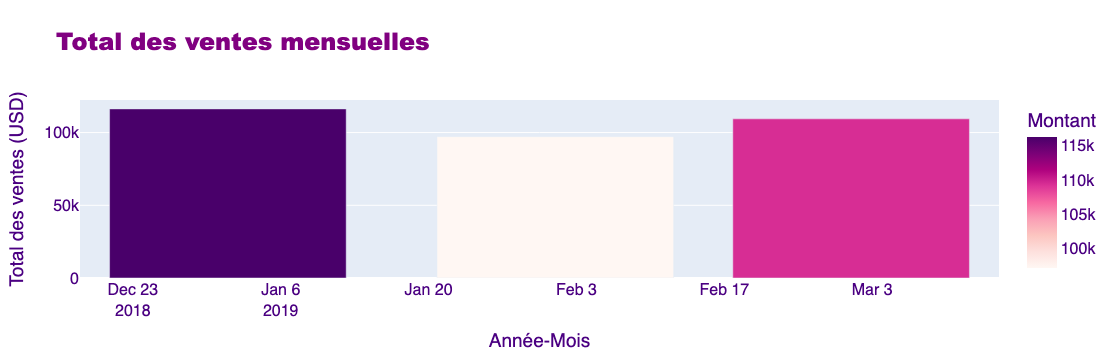

In [250]:
import plotly.express as px
import pandas as pd

# Exemple de données (remplace par ta variable monthly_sales que tu as déjà)
monthly_sales = df.groupby(['Year', 'Month'])['Total'].sum().reset_index()

# Créer une colonne pour le label mois/année
monthly_sales['Année-Mois'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Tracer un graphique en barres avec un dégradé violet/rose
fig = px.bar(
    monthly_sales,
    x='Année-Mois',
    y='Total',
    title='Total des ventes mensuelles',
    color='Total',
    color_continuous_scale=px.colors.sequential.RdPu,  # dégradé rose -> violet
    labels={'Année-Mois': 'Année-Mois', 'Total': 'Total des ventes (USD)'}
)

# Modifier la police du titre et des axes
fig.update_layout(
    title_font=dict(family="Arial Black, sans-serif", size=24, color='purple'),
    font=dict(family="Calibri, sans-serif", size=16, color='indigo'),
    coloraxis_colorbar=dict(title="Montant")
)

fig.show()



In [254]:
import pandas as pd

# S'assurer que la colonne 'Date' est bien en format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agréger les ventes mensuelles (fin de mois)
df_monthly = df.set_index('Date').resample('ME')['Total'].sum()

# Afficher le résultat
print(df_monthly)


Date
2019-01-31    116291.868
2019-02-28     97219.374
2019-03-31    109455.507
Freq: ME, Name: Total, dtype: float64


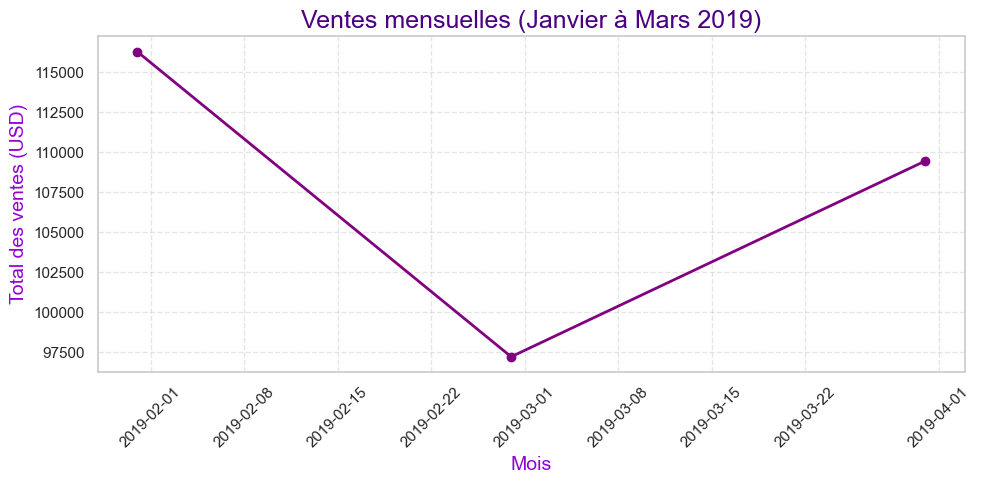

In [260]:
import matplotlib.pyplot as plt

# On filtre les trois mois souhaités
df_monthly_filtered = df_monthly.loc['2019-01-31':'2019-03-31']

# Tracé violet
plt.figure(figsize=(10, 5))
plt.plot(df_monthly_filtered.index, df_monthly_filtered.values, color='purple', marker='o', linewidth=2)

# Personnalisation
plt.title('Ventes mensuelles (Janvier à Mars 2019)', fontsize=18, color='indigo')
plt.xlabel('Mois', fontsize=14, color='darkviolet')
plt.ylabel('Total des ventes (USD)', fontsize=14, color='darkviolet')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [280]:
train = df_monthly_filtered.iloc[:2]  # Janvier + Février
test = df_monthly_filtered.iloc[2:]   # Mars


In [282]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [286]:
print(type(train))
print(train.head())
print(train.index)


<class 'pandas.core.series.Series'>
Date
2019-01-31    116291.868
2019-02-28     97219.374
Freq: ME, Name: Total, dtype: float64
DatetimeIndex(['2019-01-31', '2019-02-28'], dtype='datetime64[ns]', name='Date', freq='ME')
